In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Loan Prediction Dataset.csv')
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Preprocessing

In [6]:
# find the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# fill the missing values for numerical terms - mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [8]:
# fill the missing values for categorical terms - mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [9]:
df.isnull().sum() # check null values in dataset

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# EDA- EXploratory Data Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


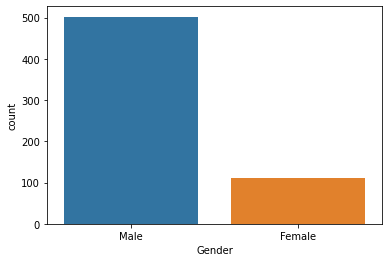

In [10]:
# Categorical attributes visualization
sns.countplot(df['Gender'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


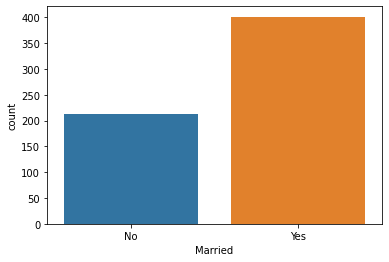

In [11]:
sns.countplot(df['Married'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


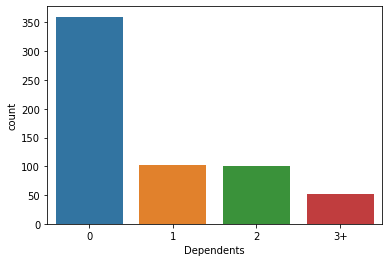

In [12]:
sns.countplot(df['Dependents'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


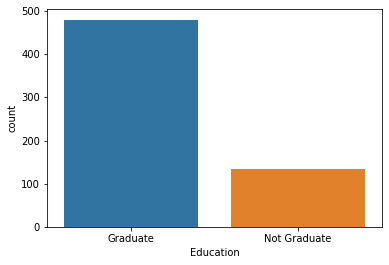

In [13]:
sns.countplot(df['Education'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


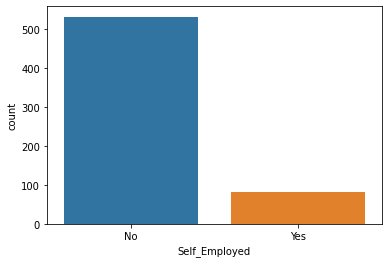

In [14]:
sns.countplot(df['Self_Employed'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


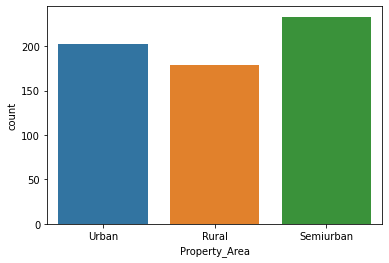

In [15]:
sns.countplot(df['Property_Area'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


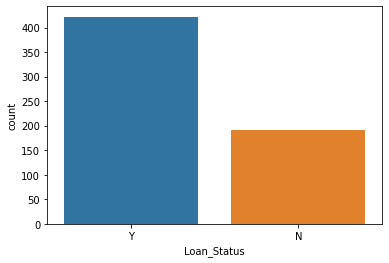

In [16]:
sns.countplot(df['Loan_Status'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


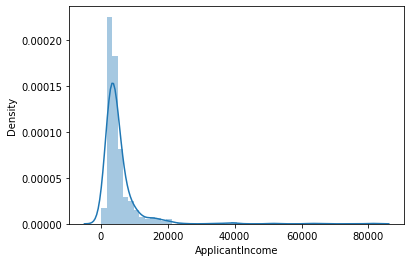

In [17]:
# numerical attributes visualization
sns.distplot(df['ApplicantIncome'])

In [65]:
# apply log transformation to the attribute
df['ApplicantIncome'] = np.log(df['ApplicantIncome'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


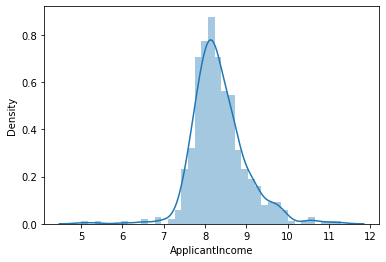

In [66]:
sns.distplot(df['ApplicantIncome'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


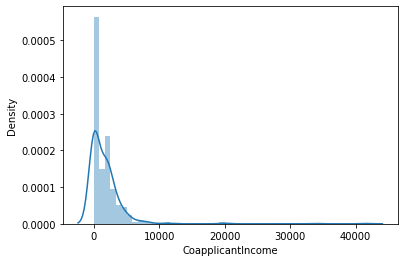

In [18]:
sns.distplot(df['CoapplicantIncome'])

In [19]:
df['CoapplicantIncome'] = np.log(df['CoapplicantIncome'])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [20]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,-inf,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,7.318540,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,-inf,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,7.765569,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,-inf,141.000000,360.0,1.0,Urban,Y


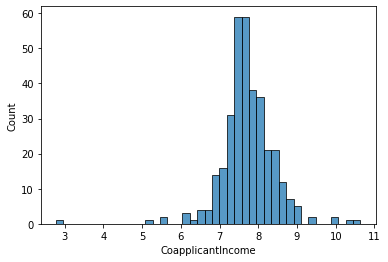

In [21]:
sns.histplot(df['CoapplicantIncome'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


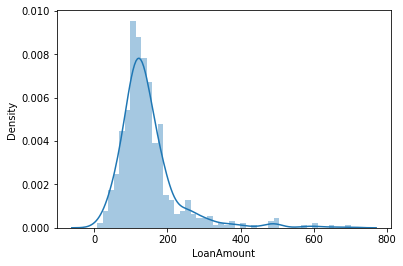

In [22]:
sns.distplot(df['LoanAmount'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


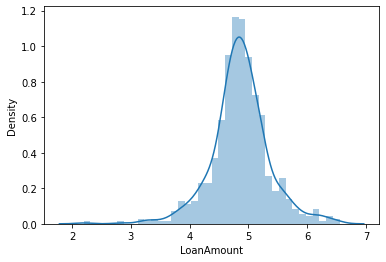

In [23]:
df['LoanAmount'] = np.log(df['LoanAmount'])
sns.distplot(df['LoanAmount'])

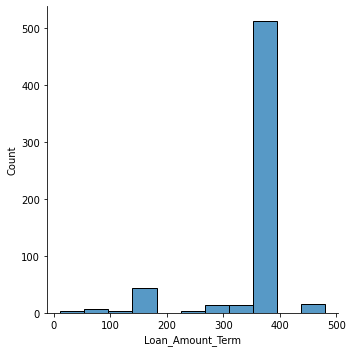

In [24]:
sns.displot(df['Loan_Amount_Term'])

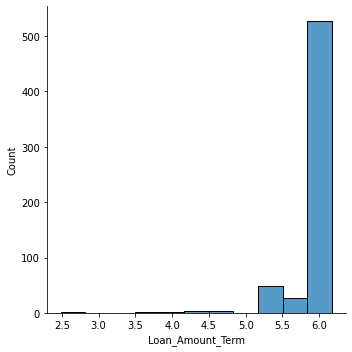

In [74]:
df['Loan_Amount_Term'] = np.log(df['Loan_Amount_Term'])
sns.displot(df['Loan_Amount_Term'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


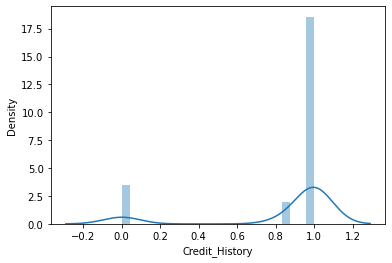

In [25]:
sns.distplot(df['Credit_History'])

# Create a new attribute

In [26]:
## Create a new attribute
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [27]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,-inf,4.986426,360.0,1.0,Urban,Y,-inf
1,LP001003,Male,Yes,1,Graduate,No,4583,7.318540,4.852030,360.0,1.0,Rural,N,4590.318540
2,LP001005,Male,Yes,0,Graduate,Yes,3000,-inf,4.189655,360.0,1.0,Urban,Y,-inf
3,LP001006,Male,Yes,0,Not Graduate,No,2583,7.765569,4.787492,360.0,1.0,Urban,Y,2590.765569
4,LP001008,Male,No,0,Graduate,No,6000,-inf,4.948760,360.0,1.0,Urban,Y,-inf


# Log Transformation


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


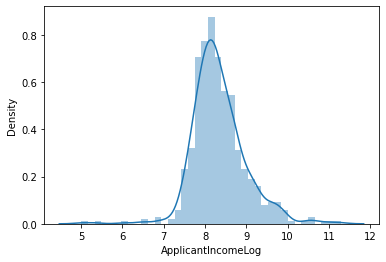

In [28]:
# Apply Log transformation to the attribute
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])
sns.distplot(df['ApplicantIncomeLog'])

In [29]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog
0,LP001002,Male,No,0,Graduate,No,5849,-inf,4.986426,360.0,1.0,Urban,Y,-inf,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,7.318540,4.852030,360.0,1.0,Rural,N,4590.318540,8.430109
2,LP001005,Male,Yes,0,Graduate,Yes,3000,-inf,4.189655,360.0,1.0,Urban,Y,-inf,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,7.765569,4.787492,360.0,1.0,Urban,Y,2590.765569,7.856707
4,LP001008,Male,No,0,Graduate,No,6000,-inf,4.948760,360.0,1.0,Urban,Y,-inf,8.699515


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


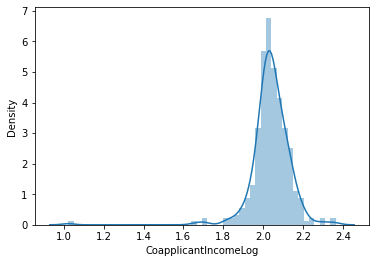

In [32]:
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome'])
sns.distplot(df['CoapplicantIncomeLog'])

In [33]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog
0,LP001002,Male,No,0,Graduate,No,5849,-inf,4.986426,360.0,1.0,Urban,Y,-inf,8.674026,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,7.318540,4.852030,360.0,1.0,Rural,N,4590.318540,8.430109,1.990411
2,LP001005,Male,Yes,0,Graduate,Yes,3000,-inf,4.189655,360.0,1.0,Urban,Y,-inf,8.006368,NaN
3,LP001006,Male,Yes,0,Not Graduate,No,2583,7.765569,4.787492,360.0,1.0,Urban,Y,2590.765569,7.856707,2.049700
4,LP001008,Male,No,0,Graduate,No,6000,-inf,4.948760,360.0,1.0,Urban,Y,-inf,8.699515,NaN


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


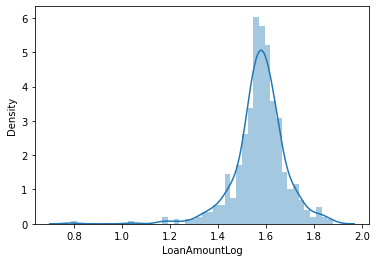

In [34]:
df['LoanAmountLog'] = np.log(df['LoanAmount'])
sns.distplot(df['LoanAmountLog'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


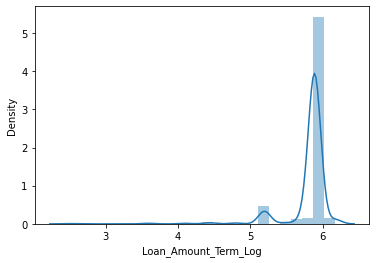

In [35]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'])
sns.distplot(df['Loan_Amount_Term_Log'])

In [36]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log
0,LP001002,Male,No,0,Graduate,No,5849,-inf,4.986426,360.0,1.0,Urban,Y,-inf,8.674026,NaN,1.606719,5.886104
1,LP001003,Male,Yes,1,Graduate,No,4583,7.318540,4.852030,360.0,1.0,Rural,N,4590.318540,8.430109,1.990411,1.579397,5.886104
2,LP001005,Male,Yes,0,Graduate,Yes,3000,-inf,4.189655,360.0,1.0,Urban,Y,-inf,8.006368,NaN,1.432618,5.886104
3,LP001006,Male,Yes,0,Not Graduate,No,2583,7.765569,4.787492,360.0,1.0,Urban,Y,2590.765569,7.856707,2.049700,1.566007,5.886104
4,LP001008,Male,No,0,Graduate,No,6000,-inf,4.948760,360.0,1.0,Urban,Y,-inf,8.699515,NaN,1.599137,5.886104


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


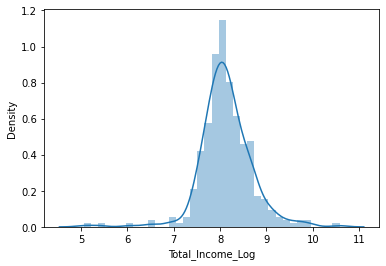

In [37]:
df['Total_Income_Log'] = np.log(df['Total_Income'])
sns.distplot(df['Total_Income_Log'])

In [38]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849,-inf,4.986426,360.0,1.0,Urban,Y,-inf,8.674026,NaN,1.606719,5.886104,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,7.318540,4.852030,360.0,1.0,Rural,N,4590.318540,8.430109,1.990411,1.579397,5.886104,8.431705
2,LP001005,Male,Yes,0,Graduate,Yes,3000,-inf,4.189655,360.0,1.0,Urban,Y,-inf,8.006368,NaN,1.432618,5.886104,NaN
3,LP001006,Male,Yes,0,Not Graduate,No,2583,7.765569,4.787492,360.0,1.0,Urban,Y,2590.765569,7.856707,2.049700,1.566007,5.886104,7.859709
4,LP001008,Male,No,0,Graduate,No,6000,-inf,4.948760,360.0,1.0,Urban,Y,-inf,8.699515,NaN,1.599137,5.886104,NaN


# Coorelation Matrix

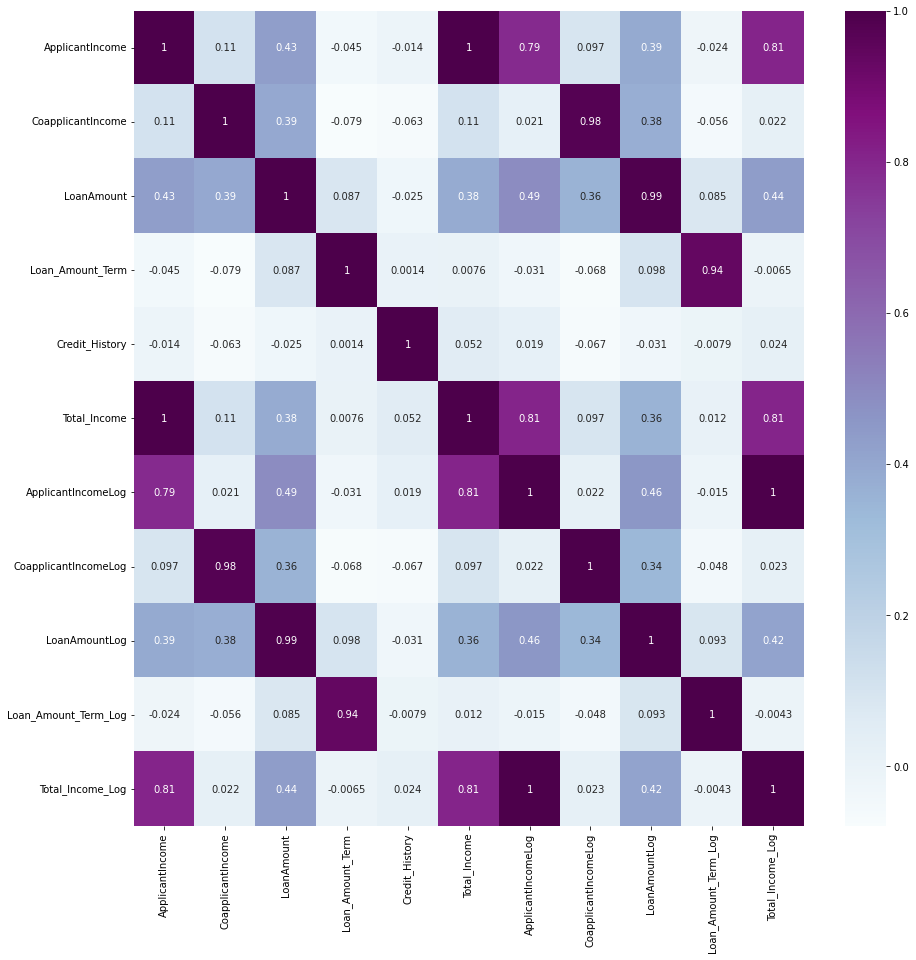

In [39]:
corr = df.corr()
plt.figure(figsize = (15,15))
sns.heatmap(corr, annot = True, cmap = 'BuPu')

In [40]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849,-inf,4.986426,360.0,1.0,Urban,Y,-inf,8.674026,NaN,1.606719,5.886104,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,7.318540,4.852030,360.0,1.0,Rural,N,4590.318540,8.430109,1.990411,1.579397,5.886104,8.431705
2,LP001005,Male,Yes,0,Graduate,Yes,3000,-inf,4.189655,360.0,1.0,Urban,Y,-inf,8.006368,NaN,1.432618,5.886104,NaN
3,LP001006,Male,Yes,0,Not Graduate,No,2583,7.765569,4.787492,360.0,1.0,Urban,Y,2590.765569,7.856707,2.049700,1.566007,5.886104,7.859709
4,LP001008,Male,No,0,Graduate,No,6000,-inf,4.948760,360.0,1.0,Urban,Y,-inf,8.699515,NaN,1.599137,5.886104,NaN


In [41]:
# Drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome',
        'LoanAmount', 'Loan_Amount_Term', 'Total_Income', 'Loan_ID', 'CoapplicantIncomeLog']
df = df.drop(columns = cols, axis = 1) # axis = 0(row),1(columns)       

In [42]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,1.606719,5.886104,NaN
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,1.579397,5.886104,8.431705
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,1.432618,5.886104,NaN
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,1.566007,5.886104,7.859709
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,1.599137,5.886104,NaN


# Label Encoding

In [43]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender', 'Dependents', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()
for col in cols:
  df[col] = le.fit_transform(df[col])

In [44]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674026,1.606719,5.886104,NaN
1,1,1,1,0,0,1.0,0,0,8.430109,1.579397,5.886104,8.431705
2,1,1,0,0,1,1.0,2,1,8.006368,1.432618,5.886104,NaN
3,1,1,0,1,0,1.0,2,1,7.856707,1.566007,5.886104,7.859709
4,1,0,0,0,0,1.0,2,1,8.699515,1.599137,5.886104,NaN


In [46]:
df = df.drop(columns = ['Total_Income_Log'], axis =1)

# Train Test Split

In [47]:
x = df.drop(columns= ['Loan_Status'], axis = 1)
y = df['Loan_Status']

In [48]:
print(x)

     Gender  Married  Dependents  Education  Self_Employed  Credit_History  \
0         1        0           0          0              0             1.0   
1         1        1           1          0              0             1.0   
2         1        1           0          0              1             1.0   
3         1        1           0          1              0             1.0   
4         1        0           0          0              0             1.0   
..      ...      ...         ...        ...            ...             ...   
609       0        0           0          0              0             1.0   
610       1        1           3          0              0             1.0   
611       1        1           1          0              0             1.0   
612       1        1           2          0              0             1.0   
613       0        0           0          0              1             0.0   

     Property_Area  ApplicantIncomeLog  LoanAmountLog  Loan_Amo

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=42)

# Model training


In [95]:
# from sklearn.model_selection import cross_val_score
# # classify function
# def classify(model, x, y):
#   x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=42)
#   model.fit(x_train, y_train)
#   print('Accuracy: ', model.score(x_test, y_test)*100)

#   # Cross validation - it is used for better validation.
#   score = cross_val_score(model, x, y, cv = 5)
#   print('Cross validation is ', np.mean(score)*100)

# Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [51]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log
0,1,0,0,0,0,1.0,2,1,8.674026,1.606719,5.886104
1,1,1,1,0,0,1.0,0,0,8.430109,1.579397,5.886104
2,1,1,0,0,1,1.0,2,1,8.006368,1.432618,5.886104
3,1,1,0,1,0,1.0,2,1,7.856707,1.566007,5.886104
4,1,0,0,0,0,1.0,2,1,8.699515,1.599137,5.886104


In [52]:
y_pred = classifier.predict(x_test)

In [71]:
print(x_test)

     Gender  Married  Dependents  Education  Self_Employed  Credit_History  \
350       1        1           0          0              0        1.000000   
377       1        1           0          0              0        0.842199   
163       1        1           2          0              0        1.000000   
609       0        0           0          0              0        1.000000   
132       1        0           0          0              0        1.000000   
..      ...      ...         ...        ...            ...             ...   
535       1        0           0          1              0        1.000000   
468       0        1           2          1              0        1.000000   
582       0        1           0          0              0        1.000000   
291       1        1           2          0              0        0.000000   
75        1        0           0          0              0        1.000000   

     Property_Area  ApplicantIncomeLog  LoanAmountLog  Loan_Amo

# Confusion Matrix & Accuracy

In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy of Logistic Regression: ',accuracy_score(y_test ,y_pred)*100)

[[21 33]
 [ 2 98]]
Accuracy of Logistic Regression:  77.27272727272727


In [54]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 5)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [55]:
print('Cross validation Logistic Regression: ', np.mean(accuracies) *100)

Cross validation Logistic Regression:  82.17391304347827


# Decision Tree Classifier

In [56]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [57]:
y_pred_Tree = classifier.predict(x_test)

In [58]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_Tree)
print(cm)
print('Accuracy of Decision Tree: ', accuracy_score(y_test, y_pred_Tree))

[[26 28]
 [15 85]]
Accuracy of Decision Tree:  0.7207792207792207


In [59]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 5)

In [60]:
print('Cross validation in Decision Tree: ', np.mean(accuracies) *100)

Cross validation in Decision Tree:  71.30434782608697


# Random Forest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)

RandomForestClassifier()

In [62]:
y_pred_RFC = classifier.predict(x_test)

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_RFC)
print(cm)
print('Accuracy of RFC: ', accuracy_score(y_test,y_pred_RFC)* 100)

[[24 30]
 [ 4 96]]
Accuracy of RFC:  77.92207792207793


In [64]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 5)

In [65]:
print('Cross validation in RFC : ', np.mean(accuracies) *100)

Cross validation in RFC :  79.78260869565219


# Hyperparameter Tunung

In [66]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, min_samples_split=25, max_depth = 7, max_features=1)
classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=7, max_features=1, min_samples_split=25)

In [67]:
y_pred_RFC_hyper = classifier.predict(x_test)

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_RFC_hyper)
print(cm)
print('Accuracy of RFC: ', accuracy_score(y_test,y_pred_RFC_hyper)* 100)

[[22 32]
 [ 2 98]]
Accuracy of RFC:  77.92207792207793


In [69]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 5)

In [70]:
print('Cross validation in RFC : ', np.mean(accuracies) *100)

Cross validation in RFC :  80.65217391304348
